In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
def import_maps(path):
    images = []
    for index, name in enumerate(os.listdir(path)):
        folder = os.path.join(path, name)
        for file_class in os.listdir(folder):
            im_folder = os.path.join(folder, file_class)

            for im in os.listdir(im_folder):
                img = cv2.imread(os.path.join(im_folder, im))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = cv2.resize(img, (196, 196))
                if img is not None:
               #     img = (img-np.mean(img))/np.std(img)
                    images.append((np.array(img), index)) 
    return images

In [3]:
image_train_set = import_maps(r'D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\train')
image_test_set = import_maps(r'D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test')

In [4]:
len(image_train_set)

12900

In [5]:
len(image_test_set)

1950

In [6]:
train_images_all = [i[0] for i in image_train_set]
train_images_array = np.array(train_images_all)
#train_images_array=np.expand_dims(train_images_array,axis=3)
train_image_label = [i[1] for i in image_train_set]
train_image_label = np.array(train_image_label)

In [7]:
test_images_all = [i[0] for i in image_test_set]
test_images_array = np.array(test_images_all)
test_images_array=np.expand_dims(test_images_array,axis=3)
test_image_label = [i[1] for i in image_test_set]
test_image_label = np.array(test_image_label)

In [8]:
train_images_array.shape

(12900, 196, 196)

In [9]:
scalar = StandardScaler(copy=False)
train_images = scalar.fit_transform(train_images_array.reshape(12900, 196*196))
train_images_array = train_images.reshape(12900, 196, 196, 1)

In [10]:
train_image_label.shape

(12900,)

In [11]:
test_images_array.shape

(1950, 196, 196, 1)

In [12]:
test_image_label.shape

(1950,)

In [13]:
train_x, val_x, train_y, val_y = train_test_split(train_images_array,train_image_label,test_size=0.2)

In [14]:
enc = OneHotEncoder(handle_unknown='ignore')
train_label_enc = enc.fit_transform(train_y.reshape(-1, 1)).toarray()
val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()

In [15]:
val_x.shape

(2580, 196, 196, 1)

In [16]:
train_y.shape

(10320,)

In [17]:
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Conv2D(input_shape=(196,196,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer= keras.regularizers.l2(0.0001)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', name='fc1'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', name='fc2'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax', name='output'))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(0.01),
               metrics=['accuracy'])

model.summary()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                            patience=10, min_lr=0.000001)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 49, 49, 256)       2

In [49]:
##Previous model Run for 200 epoch

In [19]:
history = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=32, epochs=1000, verbose=1,shuffle=True, callbacks = [reduce_lr])

Train on 10320 samples, validate on 2580 samples
Epoch 1/200
10320/10320 [==============================] - 68s 7ms/sample - loss: 1.4588 - accuracy: 0.3701 - val_loss: 1.4382 - val_accuracy: 0.3888: 1.4 - ETA: 1:14 - loss: 1.4155 - accura - ETA: 1:10 - loss: 1.4220  - ETA: 1:05 - loss: 1.4288 - accuracy: 0. - ETA: 1:04 - loss: 1.4 - ETA: 
Epoch 2/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 1.4515 - accuracy: 0.3747 - val_loss: 1.4315 - val_accuracy: 0.38884s - loss: 1.4349 - accuracy: 0.39 - ETA: 53s - loss: 1.4382 -  - ETA: 50s - loss: 1.4566 - acc - ETA: 48s - loss: 1.4485 - accuracy: - ETA: 47s - loss: 1.4388 - accuracy:  - ETA: 46s - loss: 1.4349 - a - ETA: 34s - loss: 1.4515 - accuracy - ETA: 33s - loss: 1.4504 - accuracy: 0.3 - ETA: 32s - loss: 1.4506 - accuracy: - ETA: 31s - loss: 1.4518 - accuracy: 0.3 - ETA: 30s - loss: 1.4514 -  - ETA: 27s - loss: 1.4504 - - ETA: 24s - loss: 1.4494 - accurac - ETA: 23s - loss: 1.4548 - accuracy: 0.37 - ETA: 22s 

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0398 - accuracy: 0.9763 - val_loss: 0.0338 - val_accuracy: 0.9709 - accuracy: - ETA: 24s - loss: 0.0352 - accuracy: 0.
Epoch 29/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0404 - accuracy: 0.9769 - val_loss: 0.0330 - val_accuracy: 0.9779 0.97 - ETA: 48s - loss: 0.0 - - ETA: 36s - loss: 0.0401 - ETA: 32s - loss: 0.0410 - - ETA: 29s - loss - ETA: 24s - lo - ETA: 19s - loss: 0.0422 - accuracy: 0.975 - ETA: 18s - loss: 0.0422 - ac - ETA: 4s - loss: 0.0405 - ac - ETA:  - ETA: 0s - loss: 0.0405 - accuracy: 0.97
Epoch 30/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0431 - accuracy: 0.9757 - val_loss: 0.0344 - val_accuracy: 0.9733
Epoch 31/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0414 - accuracy: 0.9740 - val_loss: 0.0347 - val_accuracy: 0.9725 - accurac - ETA: 43s - loss: 0.0350 - accuracy: 0.9 - ETA: 42s - loss: 0.0352  -
Ep

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0357 - accuracy: 0.9760 - val_loss: 0.0330 - val_accuracy: 0.9717: 55s - loss: 0.0268 -  - ETA: 6s - - ETA: 3s - ETA: 0s - loss: 0.0358 - accuracy: 0.97
Epoch 64/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0345 - accuracy: 0.9783 - val_loss: 0.0330 - val_accuracy: 0.9721
Epoch 65/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0348 - accuracy: 0.9766 - val_loss: 0.0330 - val_accuracy: 0.9725
Epoch 66/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0340 - accuracy: 0.9799 - val_loss: 0.0330 - val_accuracy: 0.9725
Epoch 67/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0343 - accuracy: 0.9790 - val_loss: 0.0330 - val_accuracy: 0.9721oss: 0.0316 - accura - ETA: 43s - los - - ETA
Epoch 68/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0353 - accuracy: 0.9771 - val_loss: 0.033

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0356 - accuracy: 0.9755 - val_loss: 0.0330 - val_accuracy: 0.9725
Epoch 109/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0359 - accuracy: 0.9774 - val_loss: 0.0330 - val_accuracy: 0.9725
Epoch 110/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0346 - accuracy: 0.9773 - val_loss: 0.0330 - val_accuracy: 0.9725
Epoch 111/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0346 - accuracy: 0.9779 - val_loss: 0.0330 - val_accuracy: 0.9725s - - ETA: - ETA: 10s - loss - ETA: 7s - loss: 0.0342 - accu - ETA: 2s - l
Epoch 112/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0347 - accuracy: 0.9766 - val_loss: 0.0330 - val_accuracy: 0.9725
Epoch 113/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0347 - accuracy: 0.9773 - val_loss: 0.0330 - val_accuracy: 0.9725s: 0.0344 - accuracy: - ETA: 

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0343 - accuracy: 0.9776 - val_loss: 0.0330 - val_accuracy: 0.9725r - ETA: 43s - loss: 0.0325 - accuracy: 0 - ETA: 42s - loss: 0.0326 - accura - ETA: 40s - loss: 0.0332 - a - ETA: 37s - loss: 0.0334 - accuracy: 0.976 - ETA: 37s - loss: 0.0331  - ETA: 34s - loss: 0.0336 - ETA
Epoch 147/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0342 - accuracy: 0.9780 - val_loss: 0.0330 - val_accuracy: 0.9725oss: 0.0351 - accuracy: - ETA: 22s - loss: 0.0353 - accura - ETA: 20s - 
Epoch 148/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0341 - accuracy: 0.9791 - val_loss: 0.0330 - val_accuracy: 0.9725T - ETA: 43s - loss: 0.03 - ETA: 39s -  - ETA: 0s - loss: 0.0342 - accura
Epoch 149/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0357 - accuracy: 0.9759 - val_loss: 0.0330 - val_accuracy: 0.9725cura
Epoch 150/200
10320/10320 [=====================

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0353 - accuracy: 0.9775 - val_loss: 0.0330 - val_accuracy: 0.9725- l - ETA: 34s - loss: 0.0328 - accu - ETA: 32s - loss: - ETA: 19s  - ETA: 12s - loss: 0.0355 - a - ETA: 10s - loss: 0.0354 - - ETA: 0s - loss: 0.0355 - accuracy: 0.
Epoch 182/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0351 - accuracy: 0.9759 - val_loss: 0.0330 - val_accuracy: 0.9725loss: 0.0404 - accuracy: 0.9 - ETA: 56s - loss: 0.0450 - accuracy: 0 - ETA: 55s - loss: 0.04 - ETA: 52s - loss: 0.0344 - accuracy: 0.978 - ETA: 51s - loss: 0.0352 - accuracy - ETA: 50s - loss: 0.0350 - accuracy: 0.97 - ETA - ETA:  - ETA: 2s - loss: 0
Epoch 183/200
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0343 - accuracy: 0.9769 - val_loss: 0.0330 - val_accuracy: 0.972556s - loss: 0.0348 - accurac - ETA: 55s - loss: 0.0396 - accur - ETA: 44s - loss: 0 - ETA: 40s - loss: 0.0331 - accurac - ETA: 38s - loss: 0.032

In [20]:
test_image = scalar.fit_transform(test_images_array.reshape(1950,196*196))
test_image_array = test_image.reshape(1950,196,196,1)

In [21]:
score = model.evaluate(test_image_array,test_label_enc)

1950/1950 [==============================] - 5s 3ms/sample - loss: 5.6721 - accuracy: 0.43900s - loss: 4.9664 - ac


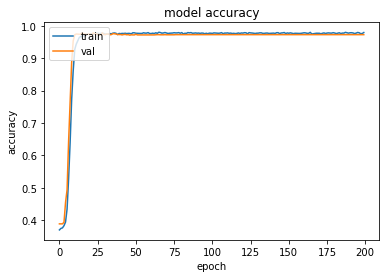

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

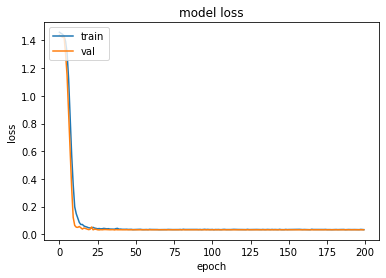

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
y_predict = model.predict(test_image_array)

In [25]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [26]:
from sklearn.metrics import confusion_matrix,precision_score,auc,recall_score,roc_curve,precision_recall_curve

In [27]:
confusion_matrix(test_image_label,y_predict_bool)

array([[ 67,   0,  36,  18,  29,   0],
       [ 95,  58,   1,  42,  90,  14],
       [ 55,  30, 322, 173,  20,   0],
       [ 50,  41,  77, 409,  23,   0],
       [  0,  24, 126,   0,   0,   0],
       [  0,   0,   0, 150,   0,   0]], dtype=int64)

In [36]:
67/(67+36+18+29)

0.44666666666666666

In [28]:
precision_score(test_image_label,y_predict_bool,average='weighted')

0.412813675115717

In [32]:
recall_score(test_image_label,y_predict_bool,average='weighted')

0.438974358974359

In [33]:
from sklearn.metrics import *

In [35]:
print(classification_report(test_image_label,y_predict_bool))

              precision    recall  f1-score   support

           0       0.25      0.45      0.32       150
           1       0.38      0.19      0.26       300
           2       0.57      0.54      0.55       600
           3       0.52      0.68      0.59       600
           4       0.00      0.00      0.00       150
           5       0.00      0.00      0.00       150

    accuracy                           0.44      1950
   macro avg       0.29      0.31      0.29      1950
weighted avg       0.41      0.44      0.42      1950



In [47]:
fpr,tpr,thresholds = roc_curve(test_image_label,y_predict_bool,pos_label=5)
print(auc(fpr,tpr))

0.7238888888888889


In [48]:
thresholds

array([6, 5, 4, 3, 2, 1, 0])

In [30]:
path = r'D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test'
images = []
for index, name in enumerate(os.listdir(path)):
    print(index)
    folder = os.path.join(path, name)
    print(folder)

0
D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test\00_5
1
D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test\06_10
2
D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test\11_15
3
D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test\16_20
4
D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test\21_25
5
D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test\26_30


In [ ]:
# model1 = Sequential()
# model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
#                  input_shape=(196, 196,1)))
# model1.add(Conv2D(64, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size=(2, 2)))
# model1.add(Flatten())
# model1.add(Dense(128, activation='relu'))
# model1.add(Dense(6, activation='softmax'))

# model1.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

# print(model1.summary())

In [ ]:
# history = model1.fit(train_images_array,train_label_enc,validation_split=0.2, batch_size=32, epochs=150, verbose=1,shuffle=True, callbacks = [reduce_lr])